## Import : data with actual stock distributed and exogenous variables 

In [1]:
import pandas as pd

df_combined=pd.read_csv('../0_data/df_combined_fullsample.csv')

## Import results from distribution(shares) models 

In [2]:
import glob
temp=glob.glob('../2_pipeline/final_distribute_*.csv')
print('\n importing results from the distribution stage of various aggregation levels \n')
print(temp)


 importing results from the distribution stage of various aggregation levels 

['../2_pipeline\\final_distribute_districtlev.csv', '../2_pipeline\\final_distribute_regionlev.csv', '../2_pipeline\\final_distribute_regionproducttypelev.csv']


In [3]:
distribute_districtlev=pd.read_csv('../2_pipeline\\final_distribute_districtlev.csv').drop(columns=['Unnamed: 0'])
distribute_regionlev=pd.read_csv('../2_pipeline\\final_distribute_regionlev.csv').drop(columns=['Unnamed: 0'])
distribute_regionproducttypelev=pd.read_csv('../2_pipeline\\final_distribute_regionproducttypelev.csv').drop(columns=['Unnamed: 0']) 

## Import SARIMAX_agg model results and merge with distribute 

In [4]:
print('Import SARIMAX_agg model results and merge with predicted distribute values')

Import SARIMAX_agg model results and merge with predicted distribute values


In [5]:
sarimax_pred_region=pd.read_csv('../2_pipeline/final_pred_region_lev.csv').rename(columns={'Unnamed: 0':'date',}).rename(columns={'stock_distributed_forecasted':'stock_forecast_agg_region'})
sarimax_pred_regionproducttype=pd.read_csv('../2_pipeline/final_pred_region_producttype_lev.csv').rename(columns={'Unnamed: 0':'date'}).rename(columns={'stock_distributed_forecasted':'stock_forecast_agg_regionproducttype'})
sarimax_pred_district=pd.read_csv('../2_pipeline/final_pred_district_lev.csv').rename(columns={'Unnamed: 0':'date'}).rename(columns={'stock_distributed_forecasted':'stock_forecast_agg_district'})

- merge sarimax_pred_region with distribute_region

In [6]:
pred_agg_region=pd.merge(left=sarimax_pred_region,right=distribute_regionlev,on=['date','region','product_code'],how='right')
pred_agg_region.describe()

,stock_forecast_agg_region,pred_share_regionlev
count,43540.000000,44504.000000
mean,159.861939,0.134986
std,250.937894,0.170963
min,-841.745126,0.000000
25%,13.673661,0.031491
50%,66.491899,0.101163
75%,177.306548,0.120171
max,3157.736225,1.000000


- merge sarimax_pred_regionproducttype with distribute_regionproducttype

In [7]:
pred_agg_regionproducttype=pd.merge(left=sarimax_pred_regionproducttype,right=distribute_regionproducttypelev,on=['date','region','product_type'],how='right')
pred_agg_regionproducttype.describe()

,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev
count,43834.000000,44504.000000
mean,334.760378,0.081804
std,507.399018,0.135923
min,-1182.403679,0.000000
25%,44.503907,0.011835
50%,150.281406,0.047299
75%,402.166707,0.078812
max,7824.049060,1.000000


- merge sarimax_pred_district with distribute_districtlev

In [8]:
pred_agg_district=pd.merge(left=sarimax_pred_district,right=distribute_districtlev,on=['date','district','product_code'],how='right')
pred_agg_district.describe()

,stock_forecast_agg_district,pred_share_districtlev
count,41194.000000,44504.000000
mean,46.853299,0.329639
std,89.914054,0.296856
min,-701.290790,0.000000
25%,2.434515,0.081187
50%,15.643780,0.215831
75%,51.997820,0.624217
max,2978.486795,1.000000


## Import three individual level sarimax results 

In [9]:
import glob
temp=glob.glob('../2_pipeline/final_pred_ind*.csv')
print('\n Import three individual level sarimax results \n')
print(temp)


 Import three individual level sarimax results 

['../2_pipeline\\final_pred_ind_lev.csv', '../2_pipeline\\final_pred_ind_rollingsmoothed_lev.csv', '../2_pipeline\\final_pred_ind_winsorized_lev.csv']


In [10]:
sarimax_ind=pd.read_csv('../2_pipeline/final_pred_ind_lev.csv').rename(columns={'Unnamed: 0':'date','stock_distributed_forecasted':'stock_forecast_agg_ind'})
sarimax_ind.head(2)

,date,stock_forecast_agg_ind,site_code,product_code
0,2016-04-01,66.912062,C1007,AS27000
1,2016-05-01,15.091281,C1007,AS27000


In [11]:
sarimax_ind_smooth=pd.read_csv('../2_pipeline/final_pred_ind_rollingsmoothed_lev.csv').rename(columns={'Unnamed: 0':'date','stock_distributed_forecasted':'stock_forecast_agg_ind_smooth'})
sarimax_ind_smooth.head(2)

,date,stock_forecast_agg_ind_smooth,site_code,product_code
0,2016-04-01,85.588195,C1007,AS27000
1,2016-05-01,57.430206,C1007,AS27000


In [12]:
sarimax_ind_winsorized=pd.read_csv('../2_pipeline/final_pred_ind_winsorized_lev.csv').rename(columns={'Unnamed: 0':'date','stock_distributed_forecasted':'stock_forecast_agg_ind_winsorized'})

sarimax_ind_winsorized.head(2)

,date,stock_forecast_agg_ind_winsorized,site_code,product_code
0,2016-04-01,66.629251,C1007,AS27000
1,2016-05-01,16.178449,C1007,AS27000


In [13]:
df_ensemble=pd.merge(left=df_combined,right=pred_agg_region.drop(columns=['agg_level']),on=['date','region','product_code','site_code'],how='left')

In [14]:
len(df_ensemble)

44504

In [15]:
df_ensemble=pd.merge(left=df_ensemble,right=pred_agg_regionproducttype.drop(columns=['agg_level']),on=['date','region','product_type','site_code','product_code'],how='left')
len(df_ensemble)

44504

In [16]:
df_ensemble=pd.merge(left=df_ensemble,right=pred_agg_district.drop(columns=['agg_level']),on=['date','district','site_code','product_code'],how='left')

                     
df_ensemble=pd.merge(left=df_ensemble,right=sarimax_ind,on=['date','site_code','product_code'],how='left')

df_ensemble=pd.merge(left=df_ensemble,right=sarimax_ind_smooth,on=['date','site_code','product_code'],how='left')


df_ensemble=pd.merge(left=df_ensemble,right=sarimax_ind_winsorized,on=['date','site_code','product_code'],how='left')

In [17]:
df_ensemble['date']=pd.to_datetime(df_ensemble['date'])

In [18]:
df_ensemble.set_index('date')['2019-10':].describe()

,year,month,stock_distributed,regionroads,regionasphaltroads,regionearthroads,regionsurfacetreatmentroads,regionpoorroads,poorroads,earthroads,...,fog,stock_forecast_agg_region,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized
count,3156.0,3156.000000,3156.0,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,...,3156.000000,3069.000000,3156.000000,3156.000000,3156.000000,3012.000000,3156.000000,2619.000000,2643.000000,2610.000000
mean,2019.0,11.000000,0.0,97.073467,12.420793,69.068961,15.583713,4.624937,0.454142,0.482912,...,1.767816,205.823472,0.135145,627.392326,0.076449,56.287631,0.348536,18.265577,18.644259,17.884570
std,0.0,0.816626,0.0,58.002963,10.074769,53.465181,10.489312,6.142992,0.496547,0.498358,...,3.792387,341.858744,0.146508,1187.468855,0.114441,156.848663,0.294072,42.073421,38.702243,47.417816
min,2019.0,10.000000,0.0,15.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-841.745126,0.000000,-1182.403679,0.000000,-701.290790,0.000000,-498.534772,-274.960053,-504.804455
25%,2019.0,10.000000,0.0,72.000000,0.000000,34.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,23.921875,0.041174,80.686994,0.012745,2.668198,0.091325,1.241874,1.765218,1.172845
50%,2019.0,11.000000,0.0,78.000000,15.000000,56.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,94.080756,0.101163,286.826624,0.046152,18.962782,0.272322,7.192807,7.429236,6.846924
75%,2019.0,12.000000,0.0,131.000000,24.000000,96.000000,19.000000,8.000000,1.000000,1.000000,...,1.313337,268.739553,0.137014,933.501934,0.078812,61.438287,0.686806,21.553683,20.898572,19.965443
max,2019.0,12.000000,0.0,206.000000,25.000000,184.000000,51.000000,19.000000,1.000000,1.000000,...,19.000000,3157.736225,1.000000,7824.049060,1.000000,2978.486795,1.000000,687.378415,559.897567,997.320797


In [19]:
df_ensemble=df_ensemble.fillna(0)

In [20]:
df_ensemble.head()

,date,site_code,product_code,year,month,stock_distributed,region,district,regionroads,regionasphaltroads,...,fog,stock_forecast_agg_region,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized
0,2019-04-01,C1004,AS21126,2019,4,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,0.0,0.0,0.101163,485.549658,0.012269,0.0,0.0,0.0,0.0,0.0
1,2019-05-01,C1004,AS21126,2019,5,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,0.0,0.0,0.101163,529.296387,0.011043,0.0,0.0,0.0,0.0,0.0
2,2019-06-01,C1004,AS21126,2019,6,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,0.0,0.0,0.101163,569.225082,0.012269,0.0,0.0,0.0,0.0,0.0
3,2019-07-01,C1004,AS21126,2019,7,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,0.0,0.0,0.101163,532.454062,0.011139,0.0,0.0,0.0,0.0,0.0
4,2019-08-01,C1004,AS21126,2019,8,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,0.0,0.0,0.101163,460.841325,0.013144,0.0,0.0,0.0,0.0,0.0


## Sort df_ensemble dataframe by date to ensure the train-test data are set up correctly 

In [21]:
df_ensemble.sort_values(by='date',inplace=True)

## Feature Engineering

### Add a few interactions 

In [22]:
df_ensemble['interaction_1']=df_ensemble['pred_share_regionlev']*df_ensemble['stock_forecast_agg_regionproducttype']
df_ensemble['interaction_2']=df_ensemble['pred_share_districtlev']*df_ensemble['stock_forecast_agg_regionproducttype']
df_ensemble['weather_interaction']=df_ensemble['maxtemp']*df_ensemble['rainfallsnowmelt']

In [23]:
columns_to_encode=['site_code', 'product_code', 'year', 'month',
       'region', 'district', 'product_type','site_type'] 
columns_continuous_exog=['regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads', 'temp',
       'maxtemp', 'pressure', 'relativehumidity', 'rainfallsnowmelt',
       'visibility', 'windspeed', 'maxsustainedwindspeed', 'rainordrizzle',
       'storm', 'fog','weather_interaction']

columns_continuous_frommodel=['stock_forecast_agg_region', 'pred_share_regionlev',
       'stock_forecast_agg_regionproducttype',
       'pred_share_regionproducttype_tlev', 'stock_forecast_agg_district',
       'pred_share_districtlev', 'stock_forecast_agg_ind',
       'stock_forecast_agg_ind_smooth', 'stock_forecast_agg_ind_winsorized','interaction_1','interaction_2']

## Setting up target 


-  the y vector should have all 0s for the last 3 months worth of data 

In [24]:
y=df_ensemble.stock_distributed

## Setting up features 

In [25]:
# Import libraries and download example data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,categories='auto')
encoded_columns =  ohe.fit_transform(df_ensemble[columns_to_encode])
import numpy as np
np.shape(encoded_columns)

(44504, 294)

- produce one-hot encoding for categorical values

In [26]:
features=pd.DataFrame(data=encoded_columns,columns=ohe.get_feature_names(columns_to_encode))
features.describe()

,site_code_C1004,site_code_C1007,site_code_C1008,site_code_C1009,site_code_C1010,site_code_C1011,site_code_C1014,site_code_C1015,site_code_C1017,site_code_C1018,...,product_type_Contraceptive Implant,product_type_Emergency Contraceptive (Pill),product_type_Female Condom,product_type_Injectable Contraceptive,product_type_Intrauterine Device (IUD),product_type_Male Condom,product_type_Oral Contraceptive (Pill),site_type_Health Center,site_type_Hospital,site_type_University Hospital/National Institute
count,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,...,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000
mean,0.005191,0.009729,0.007235,0.003842,0.006314,0.007707,0.004786,0.010853,0.005123,0.009370,...,0.244158,0.066556,0.034581,0.292962,0.041008,0.055006,0.265729,0.295816,0.680928,0.023256
std,0.071859,0.098158,0.084753,0.061868,0.079211,0.087453,0.069017,0.103612,0.071393,0.096345,...,0.429592,0.249254,0.182719,0.455126,0.198310,0.227995,0.441726,0.456414,0.466122,0.150718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- add continuous values. Put everything to a X matrix

In [27]:
X=features
X[columns_continuous_exog]=df_ensemble[columns_continuous_exog]
X[columns_continuous_frommodel]=df_ensemble[columns_continuous_frommodel]

In [28]:
X.to_csv('x.csv')

## Scale X 

In [29]:
from sklearn.preprocessing import scale
Xs = scale(X) 

# Use XGboost to make final prediction

## XGBoost
 

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [31]:
df_train=df_ensemble.set_index('date')[:'2019-9'] 
df_pred=df_ensemble.set_index('date')['2019-10':'2019-12'] 
Xs_train=Xs[:df_train.shape[0]]
y_train=y[:df_train.shape[0]]
Xs_pred=Xs[-df_pred.shape[0]:]


data_dmatrix = xgb.DMatrix(data=Xs,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 30, alpha = 10, n_estimators = 20)
xg_reg.fit(Xs_train,y_train)

preds = xg_reg.predict(Xs_pred)


In [32]:
len(preds)

3156

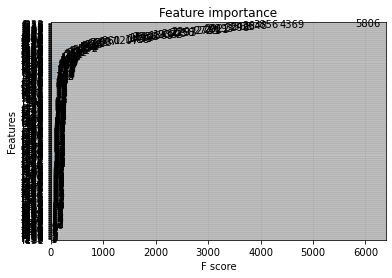

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8,10]
plt.savefig('../2_pipeline/xgboost_plot_importance.jpg')
plt.show()

## Collect Results 

In [34]:
temp=df_pred[['year','month','site_code','product_code']].copy()


In [35]:
temp['predicted_value']=preds

In [36]:
temp=temp.reset_index() 

In [37]:
temp=temp.drop(columns='date')

In [38]:
submission_format=pd.read_csv('../0_data/submission_format.csv')

In [39]:
submission=pd.merge(left=submission_format.drop(columns='predicted_value'),right=temp,on=['year','month','site_code','product_code'],how='left')
submission.describe()

,year,month,predicted_value
count,3115.0,3115.000000,3115.000000
mean,2019.0,10.996469,12.692033
std,0.0,0.816686,11.539746
min,2019.0,10.000000,-0.870592
25%,2019.0,10.000000,5.168250
50%,2019.0,11.000000,9.586978
75%,2019.0,12.000000,16.602482
max,2019.0,12.000000,128.152222


In [40]:
submission['predicted_value']=submission['predicted_value'].apply(lambda x: max(x,0))

In [41]:
submission.describe()

,year,month,predicted_value
count,3115.0,3115.000000,3115.000000
mean,2019.0,10.996469,12.693094
std,0.0,0.816686,11.538581
min,2019.0,10.000000,0.000000
25%,2019.0,10.000000,5.168250
50%,2019.0,11.000000,9.586978
75%,2019.0,12.000000,16.602482
max,2019.0,12.000000,128.152222


In [43]:
submission.head()

,year,month,site_code,product_code,predicted_value
0,2019,10,C4001,AS27134,11.061490
1,2019,10,C4001,AS27132,5.641051
2,2019,10,C4001,AS27000,13.808488
3,2019,10,C4001,AS27137,3.080781
4,2019,10,C4001,AS27138,4.736439


In [47]:
submission[['year','month','site_code','product_code','predicted_value']].to_csv('../submission.csv',index=False)